<a href="https://colab.research.google.com/github/kayodeolusanya/Jumia-Online-Shoppers-Intention/blob/main/Jumia_Online_Shoppers_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Data Dictionary

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.


In [ ]:
# To read the dataset
raw_data = pd.read_csv('/content/online_shoppers_intention.csv')


In [ ]:
# Assisgning another variable df to raw data
df = raw_data

In [ ]:
# To view the dataset
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# To check for missing values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# To view the shape of the dataset
df.shape

(12330, 18)

In [ ]:
# To view the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.describe(include=['object','bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


## Data Pre-Processing

In [ ]:
# Coverting Numerical Data type to Categorical
df['OperatingSystems'] = df['OperatingSystems'].astype('str')
df['Browser'] = df['Browser'].astype('str')
df['Region'] = df['Region'].astype('str')
df['TrafficType'] = df['TrafficType'].astype('str')
df['VisitorType'] = df['VisitorType'].astype('str')
df['Weekend'] = df['Weekend'].astype('str')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

### UNIVARIATE ANALYSIS

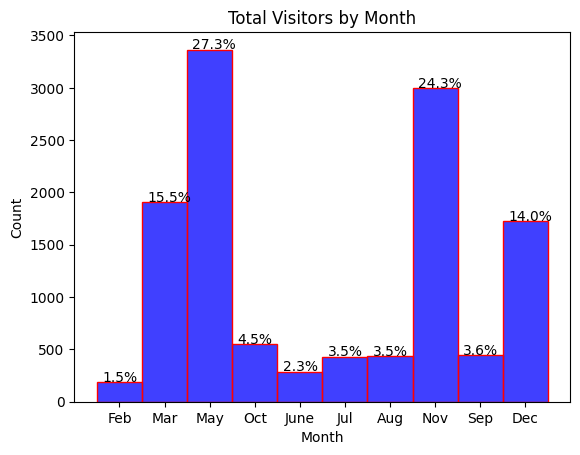

In [ ]:
# Visualizing the distribution of the categorical data by Month

ax = sns.histplot(df['Month'], color = 'blue',ec='red')
plt.title('Total Visitors by Month')

# Adding data labels to the bars
total = float(len(df['Month']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 6 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show();

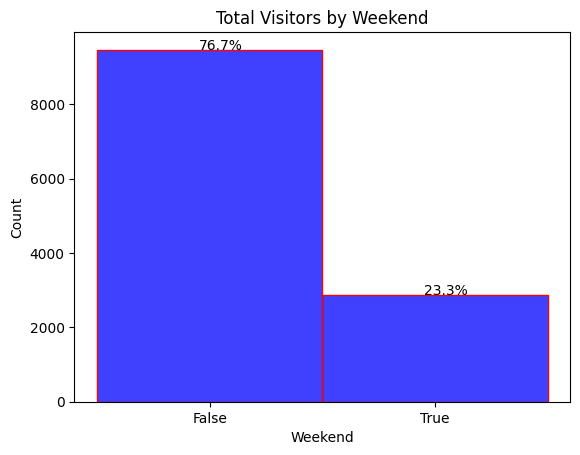

In [ ]:
# Visualizing the distribution of the data by  Weekend
ax = sns.histplot(df['Weekend'], color = 'blue',ec='red')
plt.title('Total Visitors by Weekend')

# Adding data labels to the bars
total = float(len(df['Weekend']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

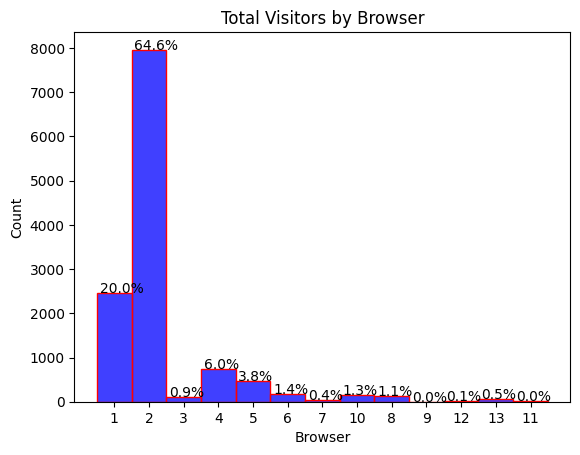

In [ ]:
# Visualizing the distribution of the data by Browser
ax = sns.histplot(df['Browser'], color = 'blue',ec='red')
plt.title('Total Visitors by Browser')

# Adding data labels to the bars
total = float(len(df['Browser']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 8 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

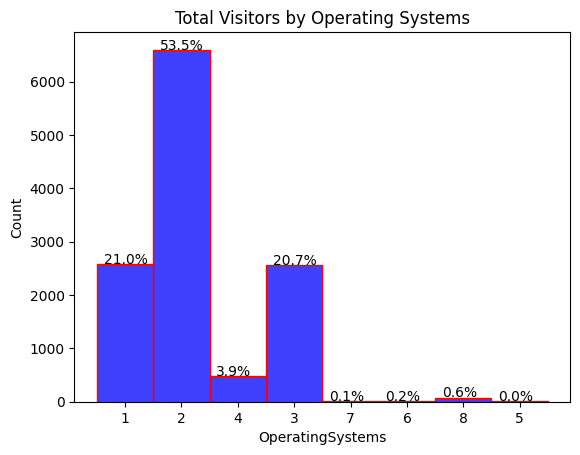

In [ ]:
# Visualizing the distribution of the Operating System
ax = sns.histplot(df['OperatingSystems'], color = 'blue',ec='red')
plt.title('Total Visitors by Operating Systems')

# Adding data labels to the bars
total = float(len(df['OperatingSystems']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 6 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

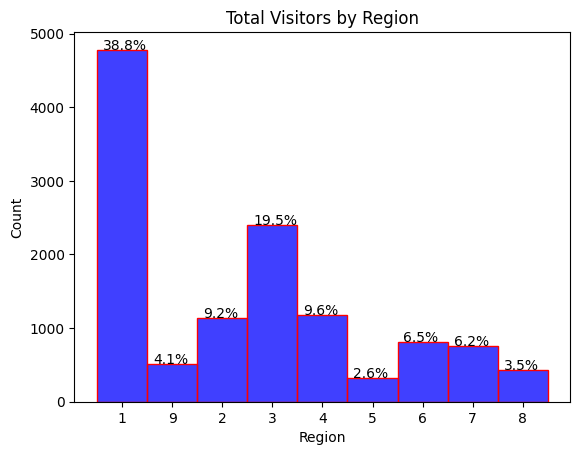

In [ ]:
# Visualizing the distribution of the data by Region
ax = sns.histplot(df['Region'], color = 'blue',ec='red')
plt.title('Total Visitors by Region')

# Adding data labels to the bars
total = float(len(df['Region']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 6 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))


plt.show()

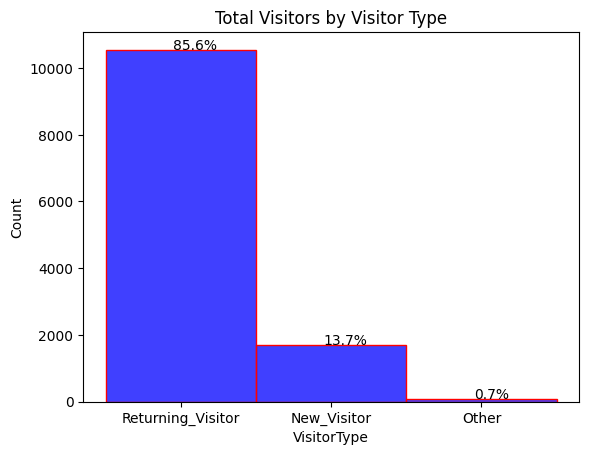

In [ ]:
# Visualizing the distribution of the data by Visitor Type
ax = sns.histplot(df['VisitorType'], color='blue',ec='red')
plt.title('Total Visitors by Visitor Type')

# Adding data labels to the bars
total = float(len(df['VisitorType']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

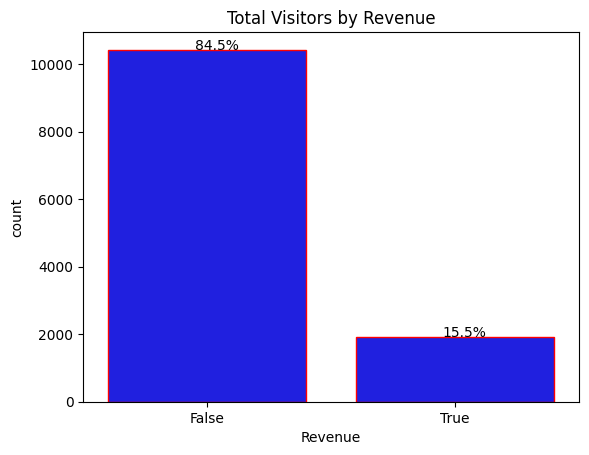

In [ ]:
# Visualizing the distribution of the data by Revenue
ax = sns.countplot(x='Revenue',data= df,color='blue',ec='red')
plt.title('Total Visitors by Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

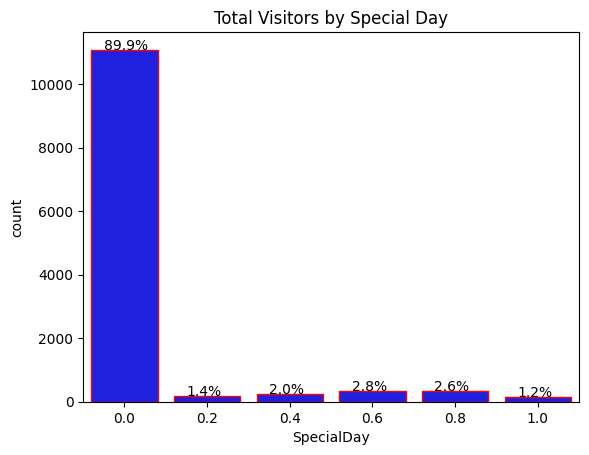

In [ ]:
# Visualizing the distribution of the data by Special Days
ax = sns.countplot(x='SpecialDay',data= df,color='blue',ec='red')
plt.title('Total Visitors by Special Day')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 4 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

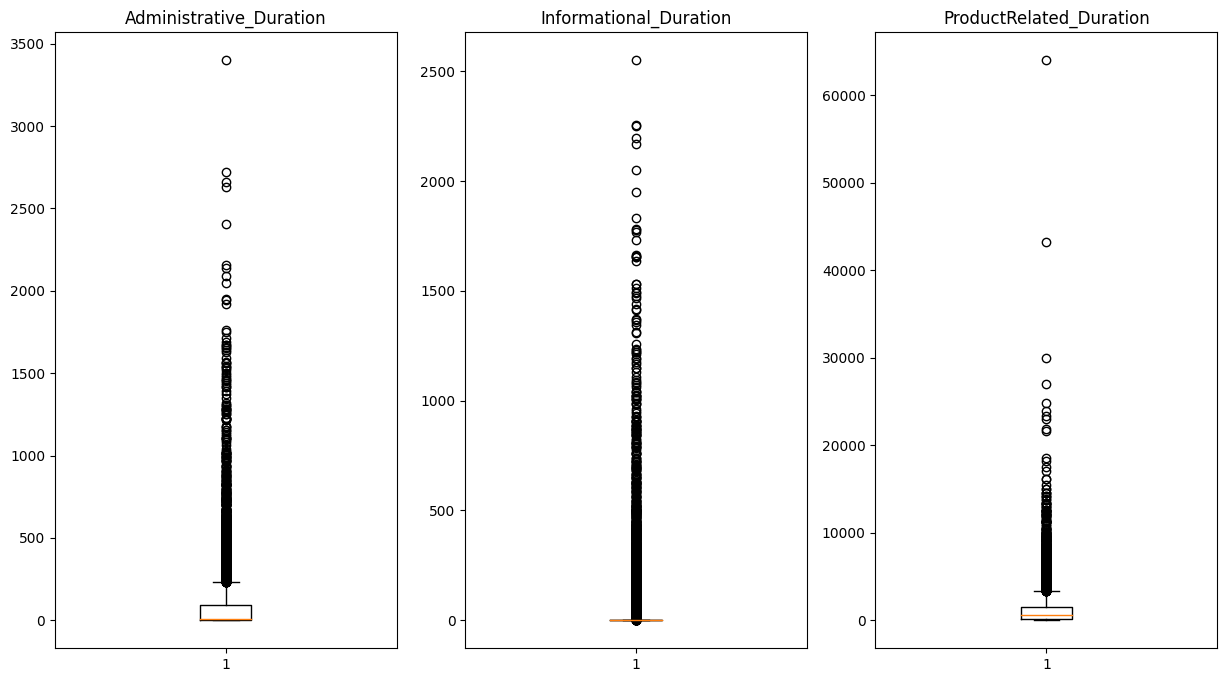

In [ ]:
# Visualizing the outlier of the data by Admin, Info and Product Related Duration
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))

ax1.boxplot(df["Administrative_Duration"])
ax1.set_title("Administrative_Duration")

ax2.boxplot(df["Informational_Duration"])
ax2.set_title("Informational_Duration")

ax3.boxplot(df["ProductRelated_Duration"])
ax3.set_title("ProductRelated_Duration")


plt.show()

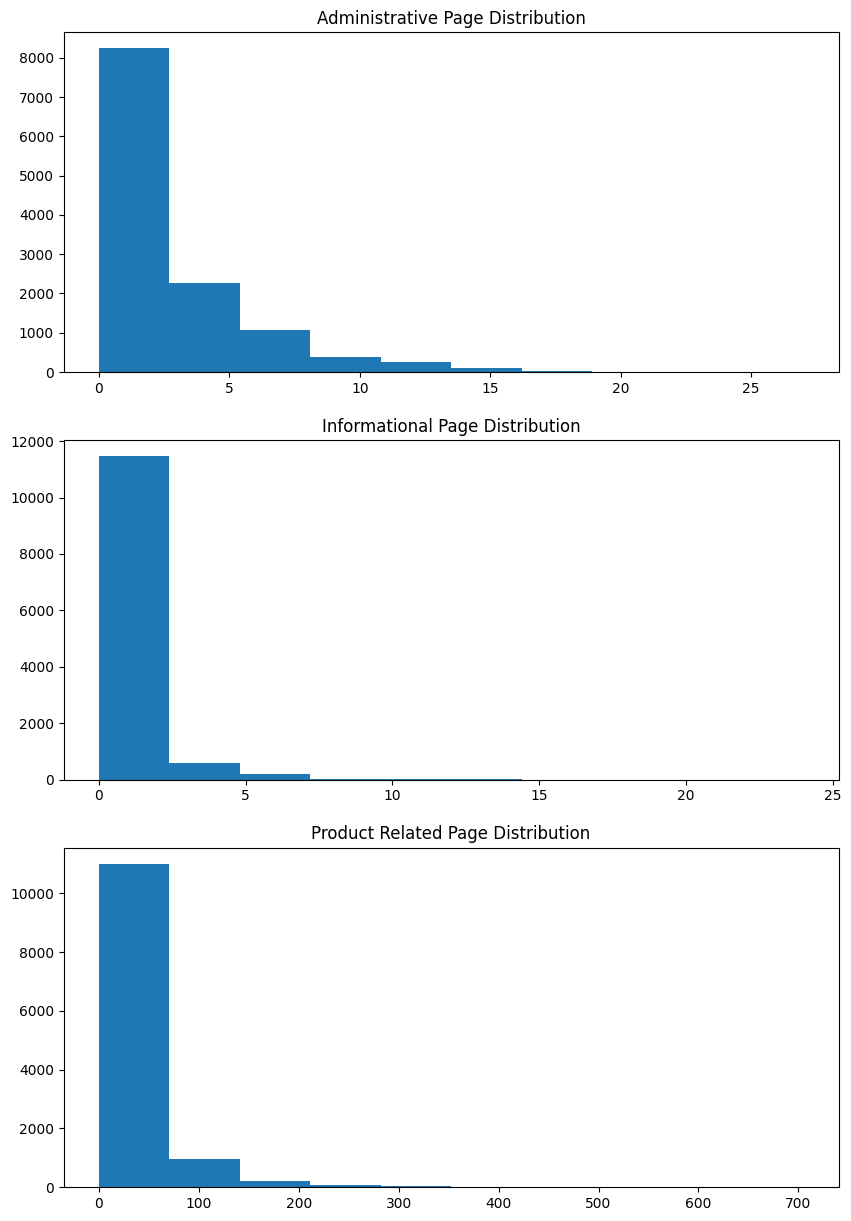

In [ ]:
# Visuali# Visualizing the distribution of the data by Admin, Info and Product Related Duration
fig, axs = plt.subplots(3, 1, figsize = (10,15))
axs[0].hist(df["Administrative"])
axs[0].set_title("Administrative Page Distribution")

axs[1].hist(df["Informational"])
axs[1].set_title("Informational Page Distribution")

axs[2].hist(df["ProductRelated"])
axs[2].set_title("Product Related Page Distribution")

plt.show()

In [ ]:
# Grouping the Adminstrative pages

def admin_group(admin):
    if admin <= 5:
        return '0-5 Pages'
    elif admin <= 10:
        return '6-10 Pages'
    elif admin <= 15:
        return '11-15 Pages'
    else:
        return '16-25 Pages'

df['admin_group'] = df['Administrative'].apply(admin_group)

# Grouping the Informational pages

def info_group(info):
    if info <= 5:
        return '0-5 Pages'
    elif info <= 10:
        return '6-10 Pages'
    elif info <= 15:
        return '11-15 Pages'
    else:
        return '16-25 Pages'

df['info_group'] = df['Informational'].apply(admin_group)

# Grouping the Product-Related pages

def prod_group(prod):
    if prod <= 5:
        return '0-100 Pages'
    elif prod <= 10:
        return '101-200 Pages'
    elif prod <= 15:
        return '201-300 Pages'
    else:
        return '301-500 Pages'

df['prod_group'] = df['ProductRelated'].apply(prod_group)
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,admin_group,info_group,prod_group
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,0-5 Pages,0-5 Pages,0-100 Pages
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,0-5 Pages,0-5 Pages,0-100 Pages
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,0-5 Pages,0-5 Pages,0-100 Pages
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,0-5 Pages,0-5 Pages,0-100 Pages
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,0-5 Pages,0-5 Pages,101-200 Pages


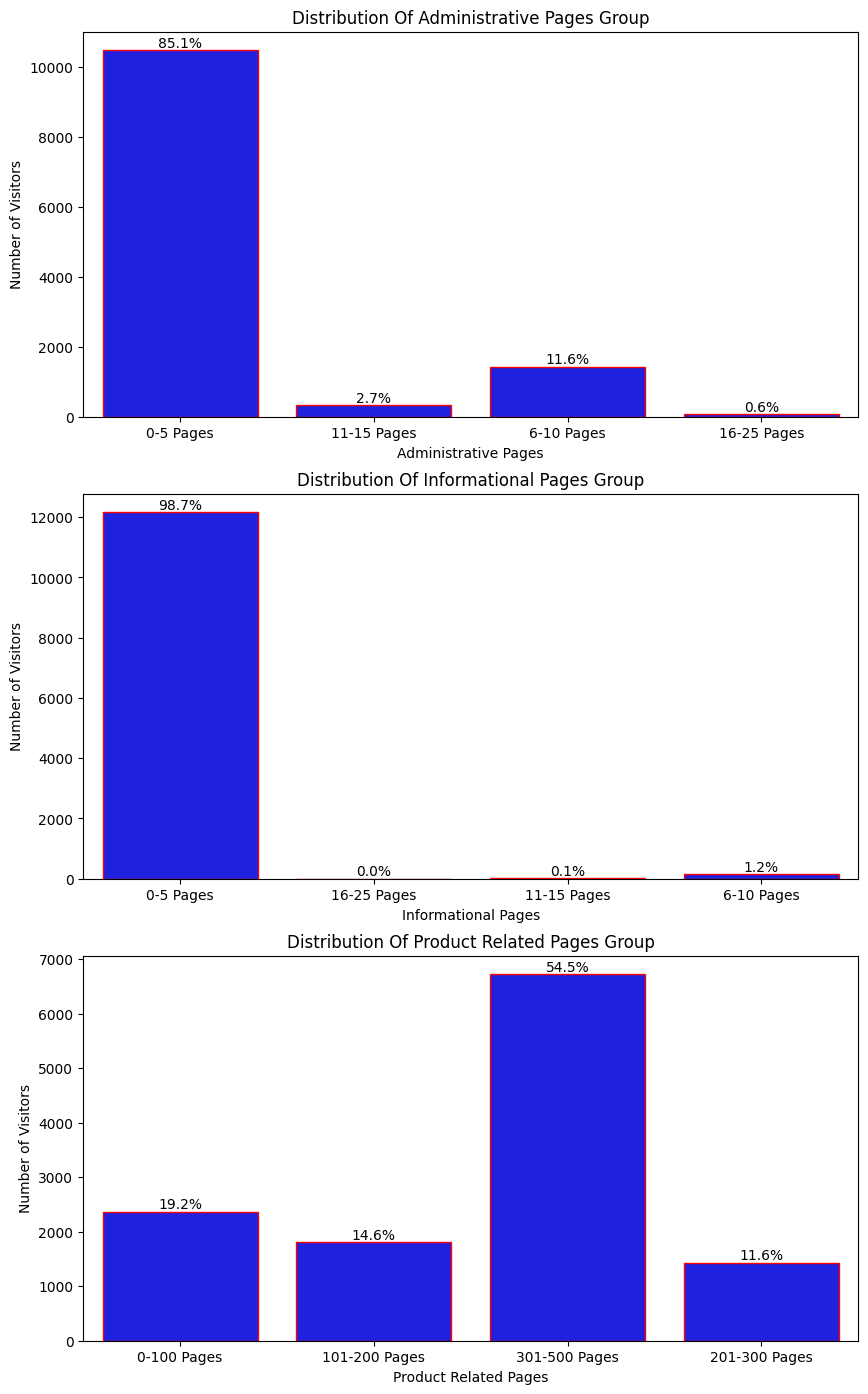

In [ ]:
# Visualizing the Distribution of the data by Admin, Info and Product Related Group
fig, axes = plt.subplots(3, 1, figsize = (10,17))
sns.countplot(x='admin_group',data=df, ax=axes[0], color='blue', ec='red')
axes[0].set_title('Distribution Of Administrative Pages Group')
axes[0].set_ylabel('Number of Visitors')
axes[0].set_xlabel('Administrative Pages')

sns.countplot(x='info_group', data=df, ax=axes[1], color='blue', ec='red')
axes[1].set_title('Distribution Of Informational Pages Group')
axes[1].set_ylabel('Number of Visitors')
axes[1].set_xlabel('Informational Pages')

sns.countplot(x='prod_group', data =df, ax=axes[2], color='blue', ec='red')
axes[2].set_title('Distribution Of Product Related Pages Group')
axes[2].set_ylabel('Number of Visitors')
axes[2].set_xlabel('Product Related Pages')


# Adding percentage labels to each bar
for ax in axes:
    total = len(df)  # Total number of data points
    for p in ax.patches:
        height = p.get_height()  # Height of the bar
        percentage = height / total * 100
        ax.text(p.get_x() + p.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')


plt.show()

## BIVARIATE ANALYSIS

Text(0.5, 0, 'Product Related Pages')

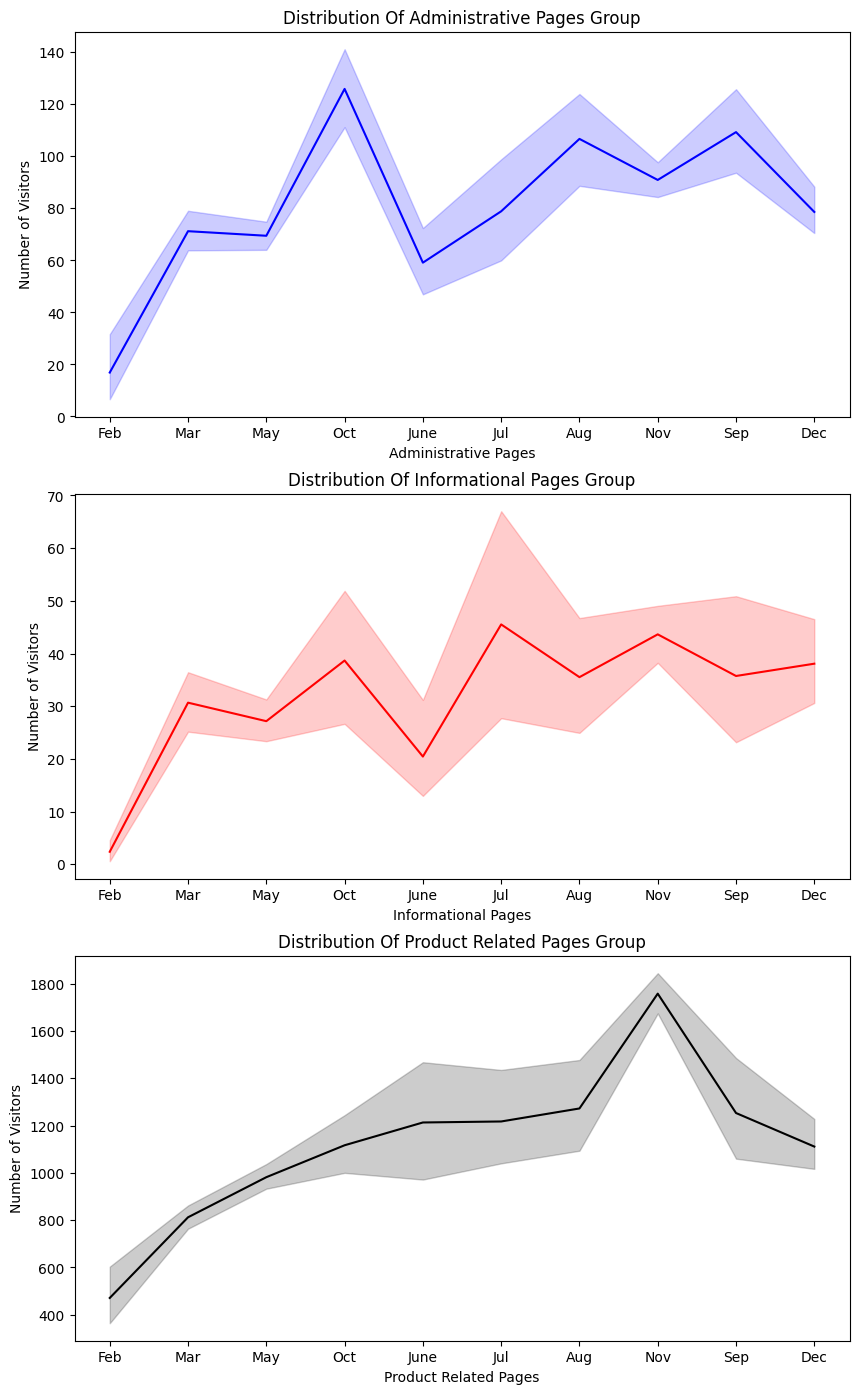

In [ ]:
# Visualizing the outlier of the data by Admin, Info and Product Related Group by Month
fig, axes = plt.subplots(3, 1, figsize = (10,17))
sns.lineplot(x= 'Month', y='Administrative_Duration',data=df, ax=axes[0], color='blue')
axes[0].set_title('Distribution Of Administrative Pages Group')
axes[0].set_ylabel('Number of Visitors')
axes[0].set_xlabel('Administrative Pages')

sns.lineplot(x= 'Month',y='Informational_Duration', data=df, ax=axes[1], color='red')
axes[1].set_title('Distribution Of Informational Pages Group')
axes[1].set_ylabel('Number of Visitors')
axes[1].set_xlabel('Informational Pages')

sns.lineplot(x= 'Month',y='ProductRelated_Duration', data =df, ax=axes[2], color='black')
axes[2].set_title('Distribution Of Product Related Pages Group')
axes[2].set_ylabel('Number of Visitors')
axes[2].set_xlabel('Product Related Pages')

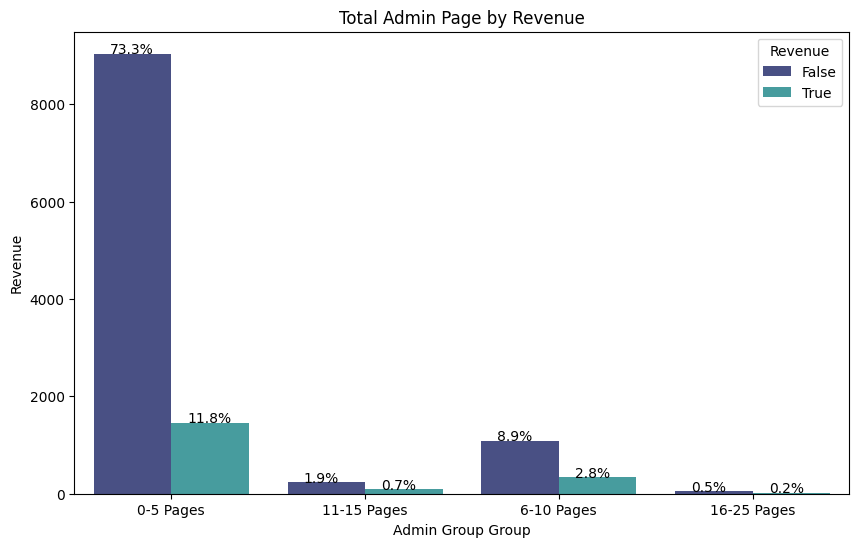

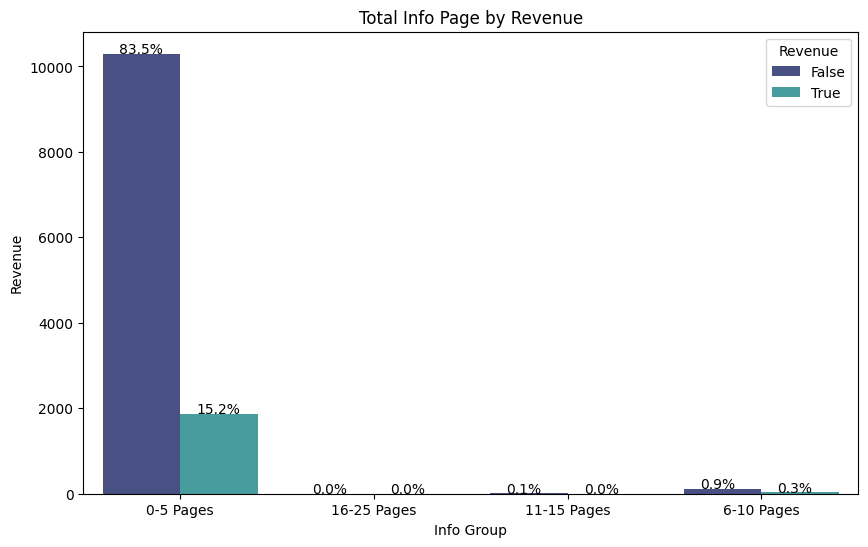

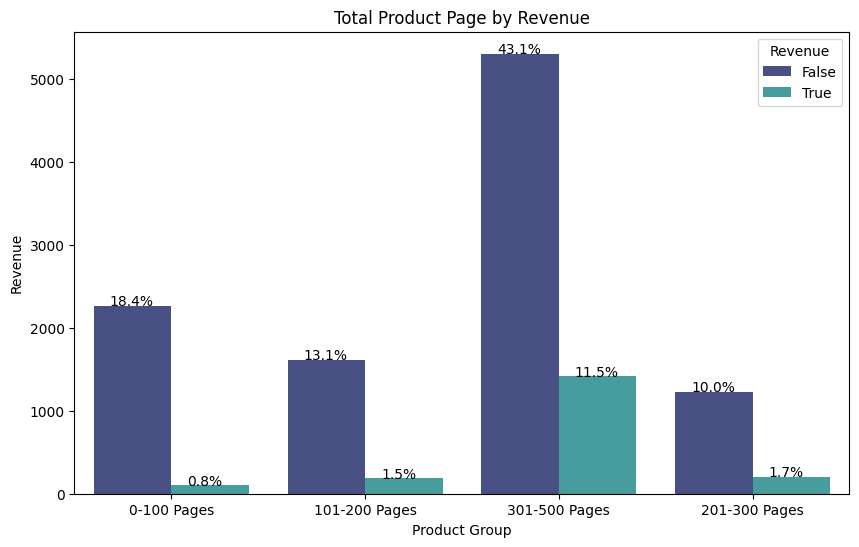

In [ ]:
# Investigating the Admin Page group by Revenue

plt.figure(figsize =(10,6))
ax = sns.countplot (x='admin_group', data=df, hue='Revenue', palette='mako')
plt.xlabel('Admin Group Group')
plt.ylabel('Revenue')
plt.title('Total Admin Page by Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 3 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))

# Investigating the Info Page group by Reveenue

plt.figure(figsize =(10,6))
ax = sns.countplot (x='info_group', data=df, hue='Revenue', palette='mako')
plt.xlabel('Info Group')
plt.ylabel('Revenue')
plt.title('Total Info Page by Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 3 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))

# Investigating the Product Page group by Reveenue

plt.figure(figsize =(10,6))
ax = sns.countplot (x='prod_group', data=df, hue='Revenue', palette='mako')
plt.xlabel('Product Group')
plt.ylabel('Revenue')
plt.title('Total Product Page by Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 3 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.show()

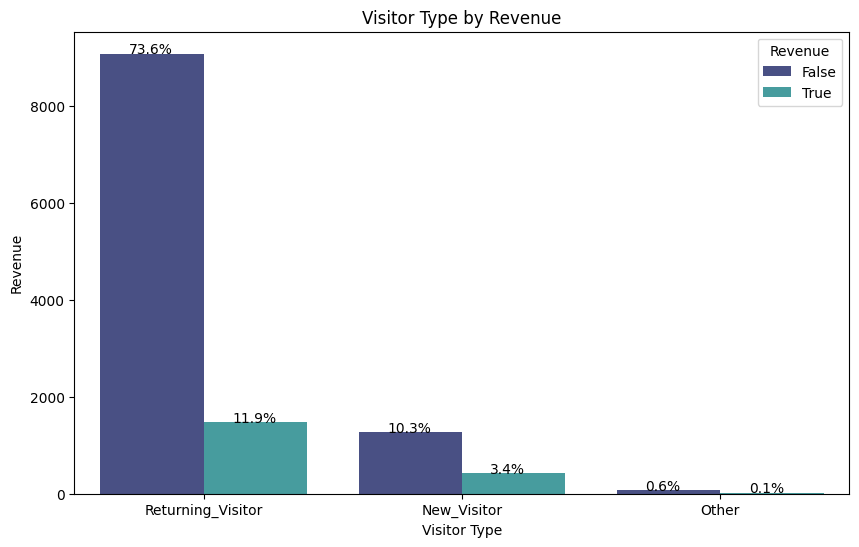

In [ ]:
# Investigating the Visitor Type by Reveenue

plt.figure(figsize =(10,6))
ax = sns.countplot (x='VisitorType', data=df, hue='Revenue', palette='mako')
plt.xlabel('Visitor Type')
plt.ylabel('Revenue')
plt.title('Visitor Type by Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.5 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.show()

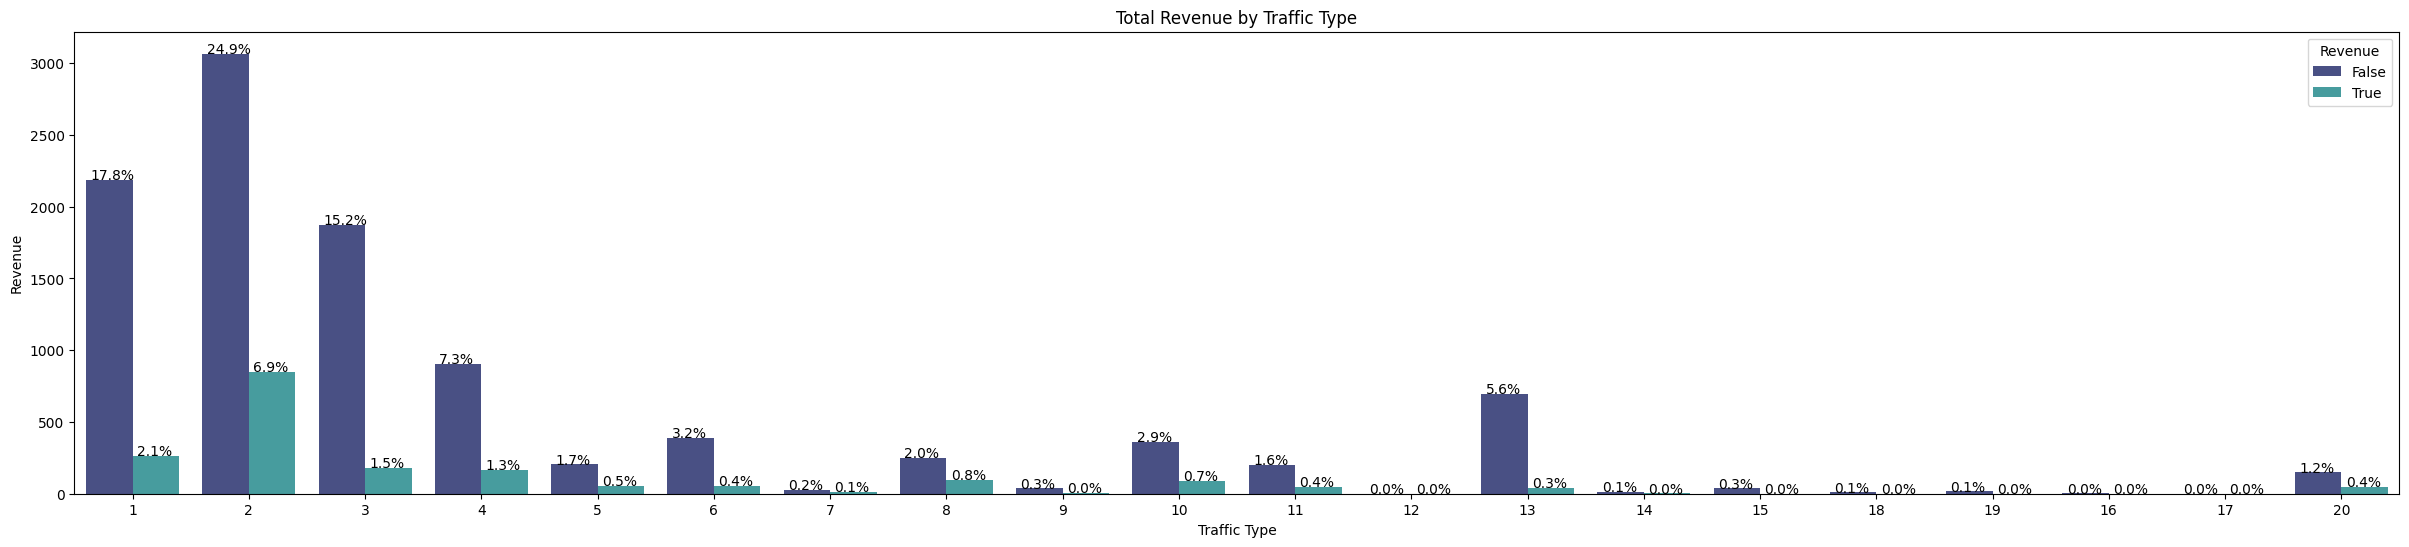

In [ ]:
# Investigating the Traffic Type by Revenue

plt.figure(figsize =(30,6))
ax = sns.countplot (x='TrafficType', data=df, hue='Revenue', palette='mako')
plt.xlabel('Traffic Type')
plt.ylabel('Revenue')
plt.title('Total Revenue by Traffic Type')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 4.5 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.show()

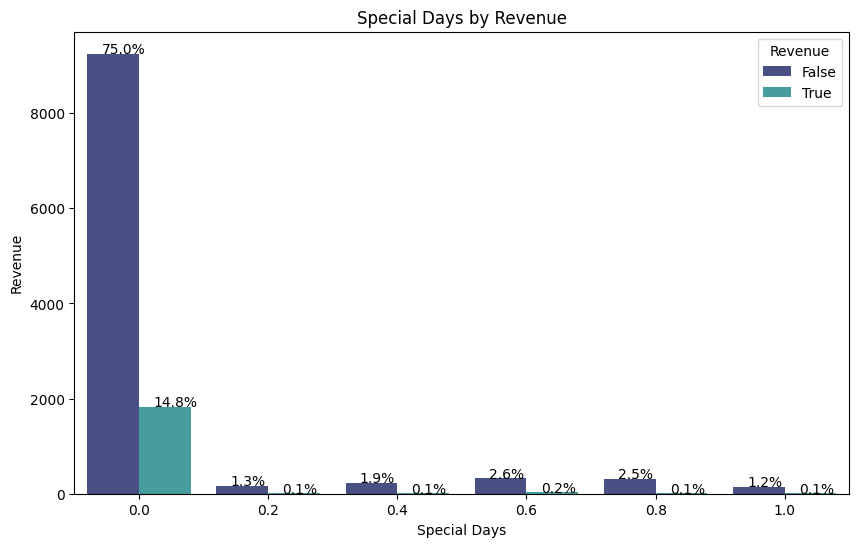

In [ ]:
# Investigating the Special Day by Reveenue

plt.figure(figsize =(10,6))
ax = sns.countplot (x='SpecialDay', data=df, hue='Revenue', palette='mako')
plt.xlabel('Special Days')
plt.ylabel('Revenue')
plt.title('Special Days by Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.5 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.show()

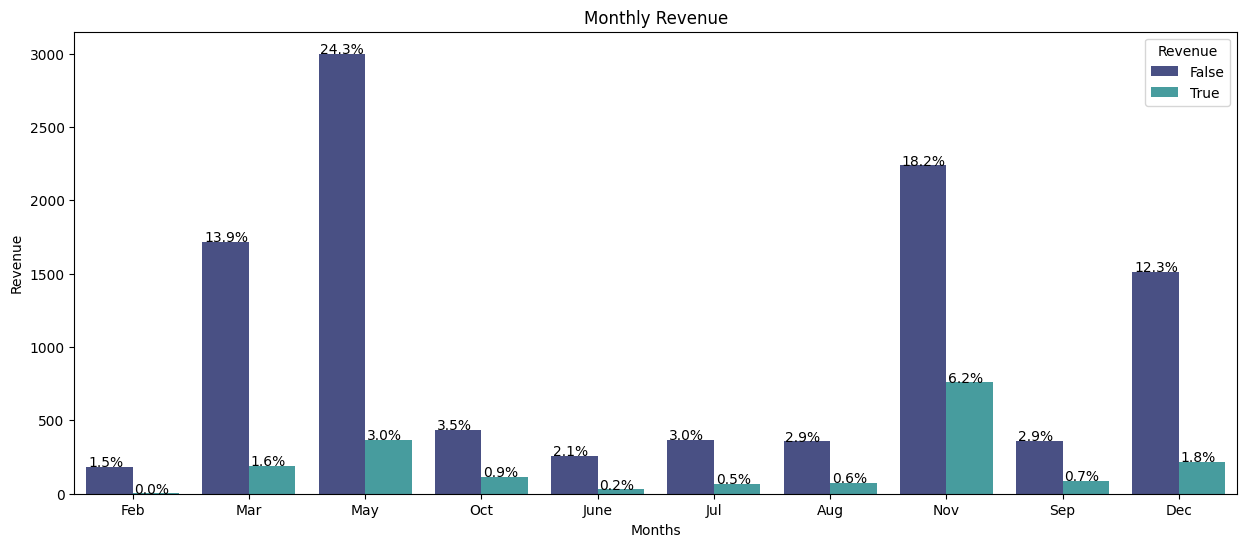

In [ ]:
# Investigating the Monhy by Revenue

plt.figure(figsize =(15,6))
ax = sns.countplot (x='Month', data=df, hue='Revenue', palette='mako')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 6.0 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.show()

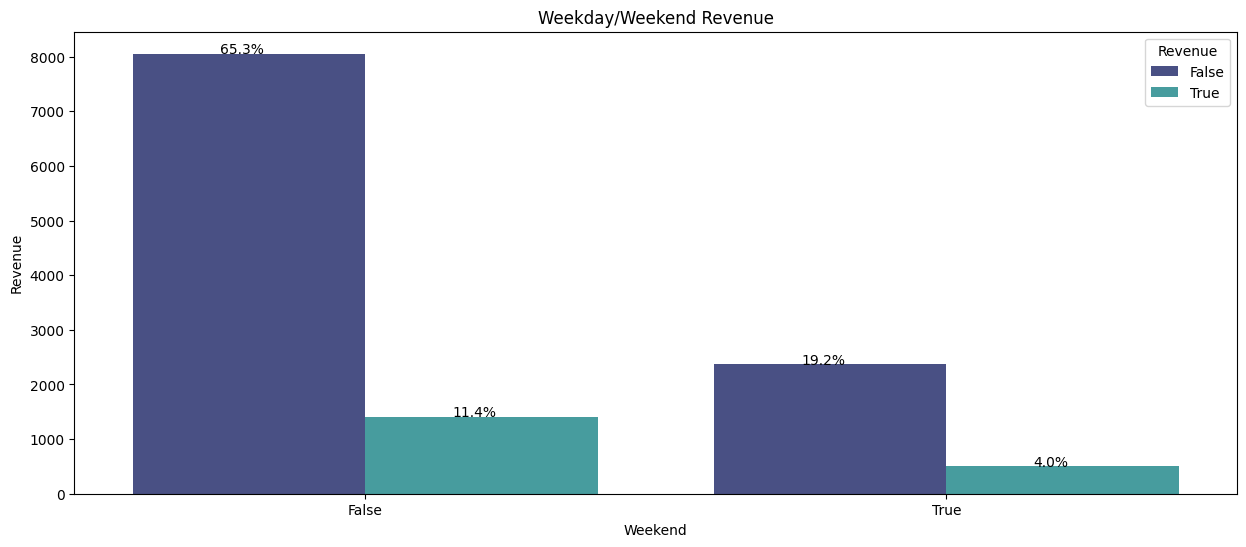

In [ ]:
# Investigating the Special Day by Reveenue

plt.figure(figsize =(15,6))
ax = sns.countplot (x='Weekend', data=df, hue='Revenue', palette='mako')
plt.xlabel('Weekend')
plt.ylabel('Revenue')
plt.title('Weekday/Weekend Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.show()

## MULTIVARIATE ANALYSIS

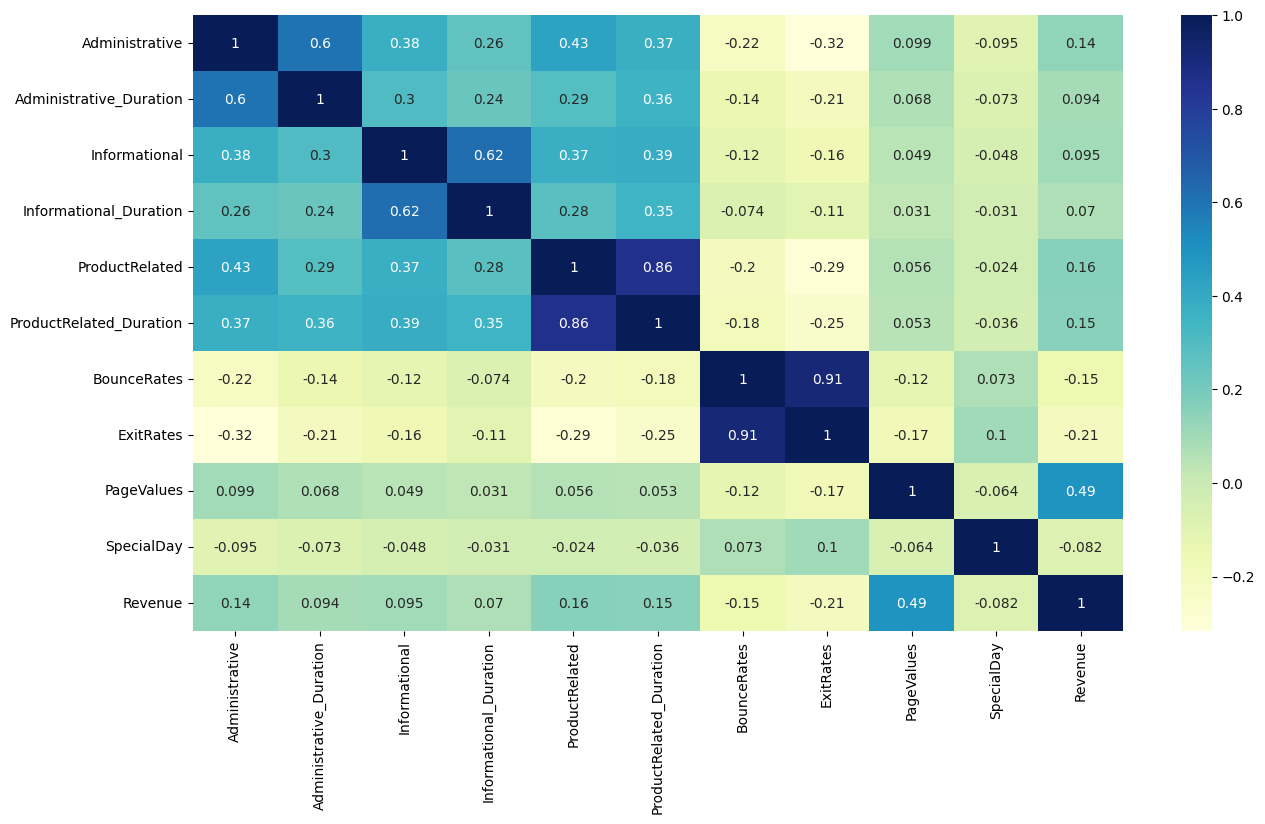

In [ ]:
# Using heatmap to visualize the correlation between the features:

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap= 'YlGnBu')
plt.show()

## MACHINE LEARNING

In [ ]:
# Calling the Dtype function to know the data types
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                       bool
admin_group                 object
info_group                  object
prod_group                  object
dtype: object

In [ ]:
# Coverting Categorical Data type to Numerical Data for ML Analysis & dropping features not needed

df['OperatingSystems'] = df['OperatingSystems'].astype('int')
df['Browser'] = df['Browser'].astype('int')
df['Region'] = df['Region'].astype('int')
df['TrafficType'] = df['TrafficType'].astype('int')
df = df.drop(['admin_group'], axis=1)
df = df.drop(['info_group'], axis=1)
df = df.drop(['prod_group'], axis=1)
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [ ]:
# Coverting Categorical Data type to Numerical Data for ML Analysis
ml_df = df

In [ ]:
# Label Encoding for Features with object and Boolean Dtype
encoder = LabelEncoder()

#Looping for columns
for c in df.columns[1:]:
  if(df[c].dtype=='object' or df[c].dtype=='bool'):
    df[c] = encoder.fit_transform(df[c])
  else:
    df[c] = df[c]

ml_df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
# Normalizing the data
scaler = MinMaxScaler()

ml_df['Scaled_Admin_Duration'] = scaler.fit_transform(ml_df['Administrative_Duration'].values.reshape(-1,1))
ml_df["Scaled_Info_Duration"] = scaler.fit_transform(ml_df['Informational_Duration'].values.reshape(-1,1))
ml_df["Scaled_ProdRel_Durations"] = scaler.fit_transform(ml_df['ProductRelated_Duration'].values.reshape(-1,1))

#Dropping features we dont need
ml_df.drop('Administrative_Duration', axis=1, inplace=True)
ml_df.drop('Informational_Duration', axis=1, inplace=True)
ml_df.drop('ProductRelated_Duration', axis=1, inplace=True)
ml_df.head(2)


,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Scaled_Admin_Duration,Scaled_Info_Duration,Scaled_ProdRel_Durations
0,0,0,1,0.2,0.2,0.0,0.0,2,1,1,1,1,2,0,0,0.0,0.0,0.000
1,0,0,2,0.0,0.1,0.0,0.0,2,2,2,1,2,2,0,0,0.0,0.0,0.001


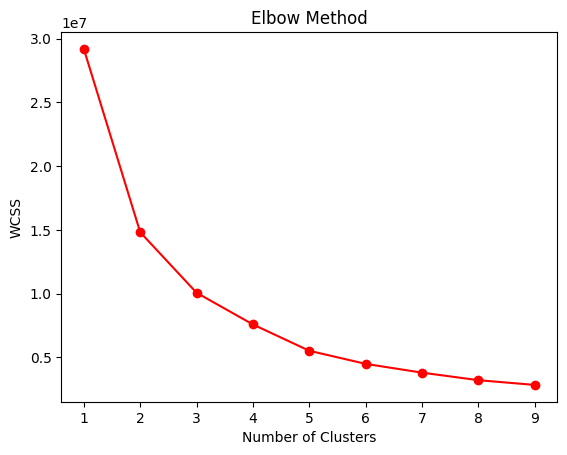

In [ ]:
# Determining the numbers of clusters using the Elbow Method
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=25)
  kmeans.fit(ml_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(ml_df)

# Adding the cluster labels to data
ml_df['Cluster'] = kmeans.labels_

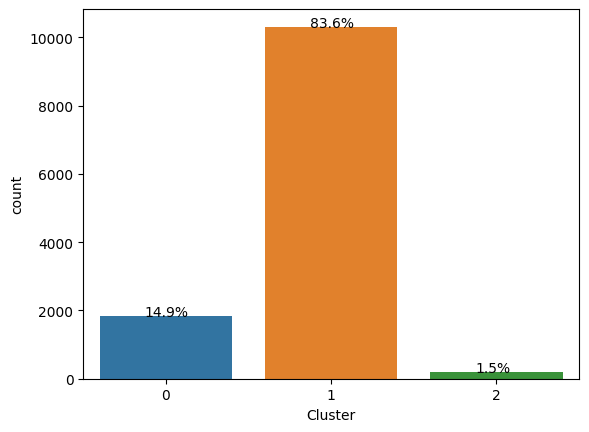

In [ ]:
# Visualizing the count of Numbers in each cluster
ax = sns.countplot(x='Cluster', data=ml_df)

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.5 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.show()

In [ ]:
# Seperating the Data and the Label ( x= data, y = label)

label = ml_df['Revenue']
ml_df = ml_df.drop(columns=['Revenue'], axis=1)

In [ ]:
# Spliting the dataset into trainning and testing sets

x_train, X_test, y_train, y_test = train_test_split(ml_df, label, test_size=0.3, random_state=42)

Decision Tree Classifier
Accuracy: 0.8491484184914841
Precision: 0.5141430948419301
Recall: 0.5373913043478261
F1-score: 0.5255102040816327
AUC-ROC: 0.7219606969882537


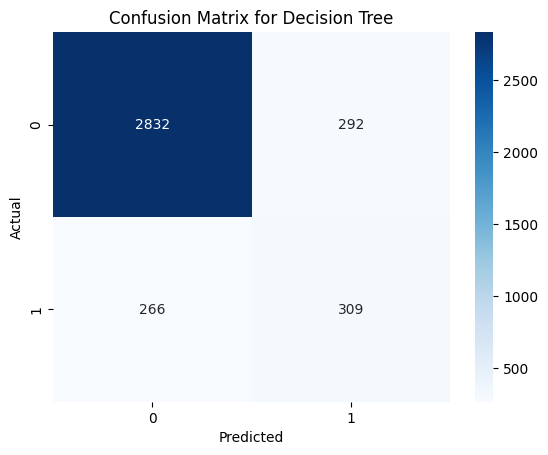

In [ ]:
# DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(X_test)

print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, dtc_pred))
print('Precision:', precision_score(y_test, dtc_pred))
print('Recall:', recall_score(y_test, dtc_pred))
print('F1-score:', f1_score(y_test, dtc_pred))
print('AUC-ROC:', roc_auc_score(y_test, dtc_pred))

# Visualizing the confusion matrix

dcm = confusion_matrix(y_test, dtc_pred)

sns.heatmap(dcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Logistic Regression
Accuracy: 0.8813192754798594
Precision: 0.7481751824817519
Recall: 0.3565217391304348
F1-score: 0.48292108362779734
AUC-ROC: 0.6672173356343595


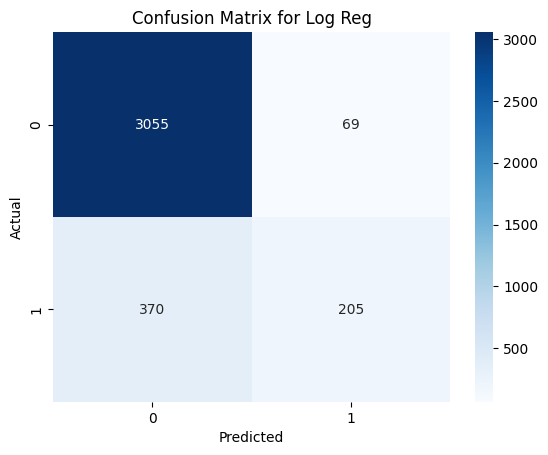

In [ ]:
# Logistics Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

ly_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

# Visualizing the Confusion Matrix For Logistics Regression

lcm = confusion_matrix(y_test, ly_pred)

sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Log Reg')
plt.show()

XGBClassifier
Accuracy: 0.8915923222492566
Precision: 0.6790123456790124
Recall: 0.5739130434782609
F1-score: 0.6220546654099905
AUC-ROC: 0.7619885319824083


<function matplotlib.pyplot.show(close=None, block=None)>

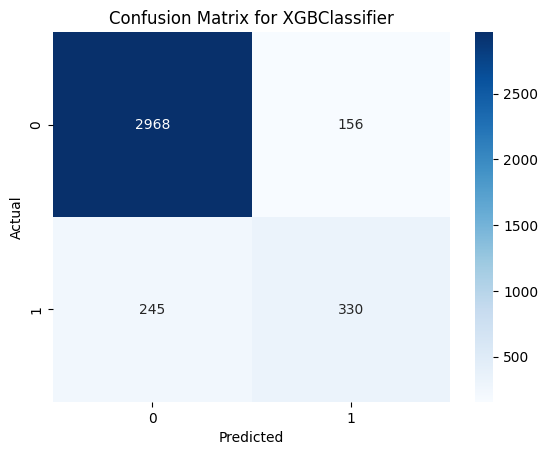

In [ ]:
# XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(X_test)

print('XGBClassifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

# # Visualizing the confusion matrix for XGBClassifier

XGB = confusion_matrix(y_test, y_pred)

sns.heatmap(XGB, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBClassifier')
plt.show

Random Forest Classifier
Accuracy: 0.8959178156258448
Precision: 0.7188940092165899
Recall: 0.542608695652174
F1-score: 0.6184340931615461
AUC-ROC: 0.7517780994265991


<function matplotlib.pyplot.show(close=None, block=None)>

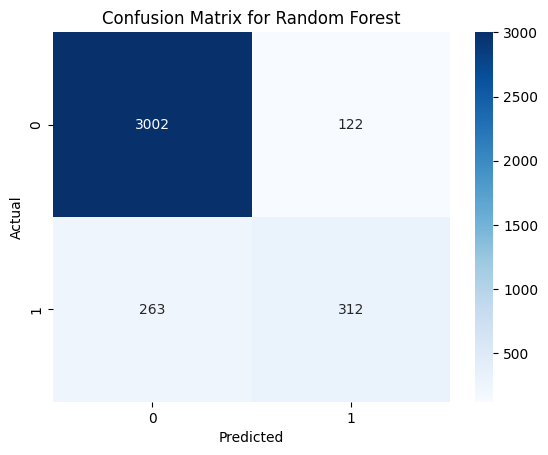

In [ ]:
# Random forest classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfc_pred))
print('Precision:', precision_score(y_test, rfc_pred))
print('Recall:', recall_score(y_test, rfc_pred))
print('F1-score:', f1_score(y_test, rfc_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfc_pred))

# Visualizing the confusion matrix for Random forest classifier

rfc = confusion_matrix(y_test, rfc_pred)

sns.heatmap(rfc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show

GaussianNB
Accuracy: 0.7956204379562044
Precision: 0.41012909632572
Recall: 0.7182608695652174
F1-score: 0.5221238938053098
AUC-ROC: 0.7640600122473975


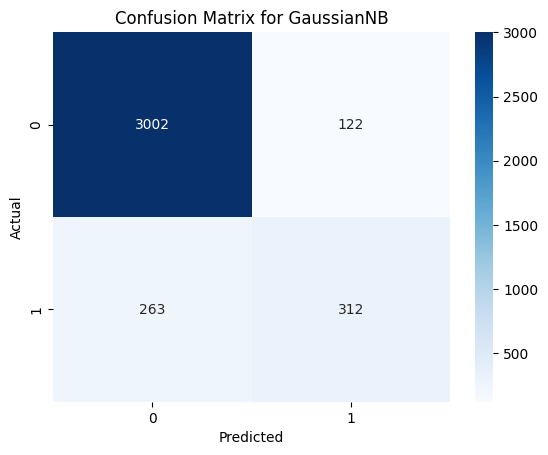

In [ ]:
# GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(X_test)

print('GaussianNB')
print('Accuracy:', accuracy_score(y_test, gnb_pred ))
print('Precision:', precision_score(y_test, gnb_pred ))
print('Recall:', recall_score(y_test, gnb_pred ))
print('F1-score:', f1_score(y_test, gnb_pred ))
print('AUC-ROC:', roc_auc_score(y_test, gnb_pred ))

# Visualizing the confusion matrix for GaussianNB

gnb = confusion_matrix(y_test, gnb_pred)

sns.heatmap(rfc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GaussianNB')
plt.show()